# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

#### Problem Statement
E-news Express aims to increase its new subscribers by improving user engagement on its landing page. The company suspects that a poorly designed webpage may be contributing to the decline in new monthly subscriptions. A redesigned landing page was created to address this, and an A/B test was conducted to assess its effectiveness in increasing user engagement and conversion rates.

The objective of this analysis is to determine whether the new landing page performs better than the existing one in terms of user engagement and conversions and to explore the impact of language preference on subscription rates and engagement.

#### Objectives

1. Analyze user engagement:

Compare the time spent by users on the new landing page to the existing one to determine if the new landing page design retains user attention longer.

2. Evaluate conversion rates:

Compare the conversion rates (percentage of users who switch from the old page to the new one) to assess if the new landing page encourages users to transition.

3. Assess the impact of language preference on conversion rates:

Investigate whether the likelihood of conversion depends on the user's preferred language using a contingency table.

4. Examine time spent by different language users:

Determine if the time spent on the new landing page varies significantly across different language preferences.

#### Statistical Analysis Plan:

1. Conduct a two-sample t-test to compare the time spent on both landing pages.

2. Perform a proportion test (Z-test for proportions) to compare the conversion rates.

3. Use a chi-square test on a contingency table to check if conversion status is dependent on language preference.

4. Conduct an ANOVA test to compare the time spent on the new page across different language groups.

## Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# library of statistical functions
import scipy.stats as stats

## Reading the Data into a DataFrame

In [3]:
# Loading the dataset
df = pd.read_csv("C:\\Users\\mardin\\Downloads\\DATASETS\\abtest.csv")

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [4]:
# Viewing the first five rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Viewing the last five rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# Checking the number of rows and columns
df.shape

(100, 6)

There are 100 rows and 6 columns in the dataset.

In [7]:
# Checking the data types of the different columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
# Checking the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


In [9]:
# Checking for missing values 
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the dataset

In [10]:
# Checking for duplicates in the dataset
df.duplicated().sum()

0

There are no duplicates in the dataset.

### Univariate Analysis

**Categorical Variables**

In [11]:
# Group (Control vs Treatment)
df["group"].value_counts()

group
control      50
treatment    50
Name: count, dtype: int64

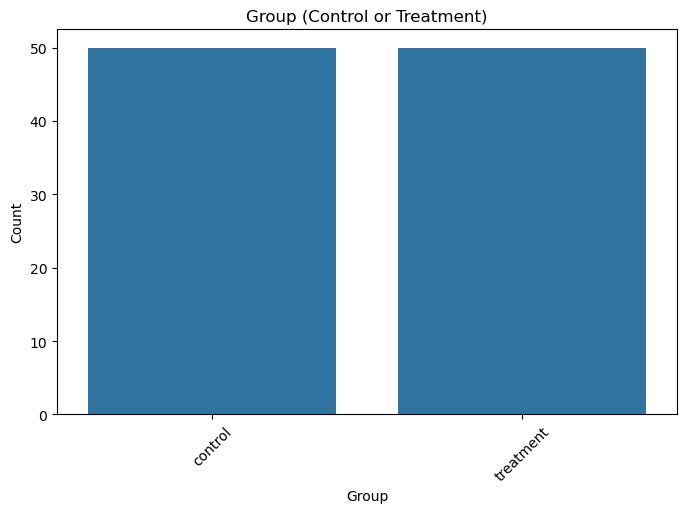

In [12]:
# Visualization showing group whether control or treatment
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "group")
plt.title("Group (Control or Treatment)")
plt.xlabel("Group")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

The users were divided into two equal groups of 50 that is, control group and treatment group.

In [13]:
# Landing page (Old vs new)
df["landing_page"].value_counts()

landing_page
old    50
new    50
Name: count, dtype: int64

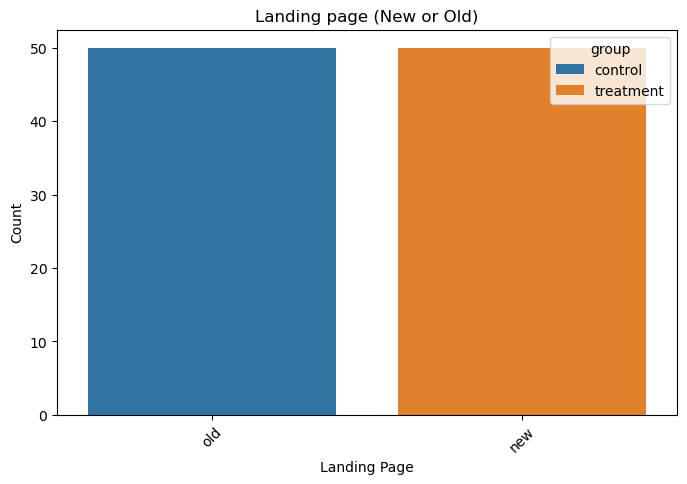

In [14]:
# Visualization showing landing page whether new or old
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "landing_page", hue = "group")
plt.title("Landing page (New or Old)")
plt.xlabel("Landing Page")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

The existing landing page was served to the control group whereas the new landing page was served to the treatment group

In [15]:
# Checking number of users who converted or not
df["converted"].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

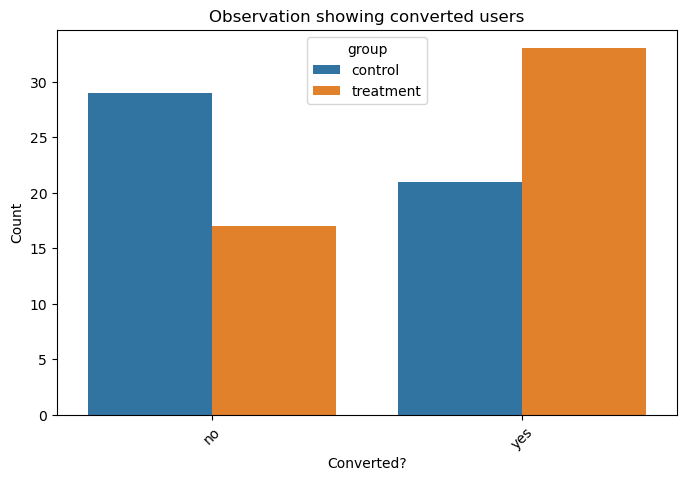

In [16]:
# Visualization showing number of users who were converted
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "converted", hue = "group")
plt.title("Observation showing converted users")
plt.xlabel("Converted?")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

54 users were converted whereas 46 were not. A higher proportion of converted users came from the treatment group who were using the new page.

In [17]:
# Checking the language preferred by users
df["language_preferred"].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

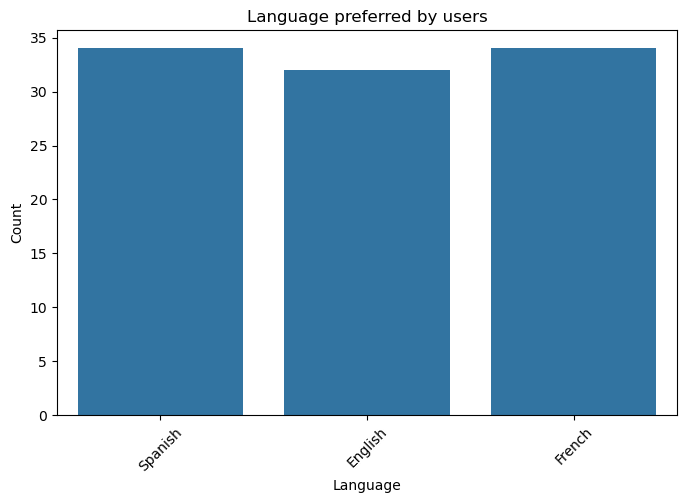

In [18]:
# Visualization showing language preferred by users
plt.figure(figsize = (8,5))
sns.countplot(data = df, x = "language_preferred")
plt.title("Language preferred by users")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show();

It's observed that 34 users preferred Spanish, 34 users preferred French and 32 users preferred English.

**Numerical variables**

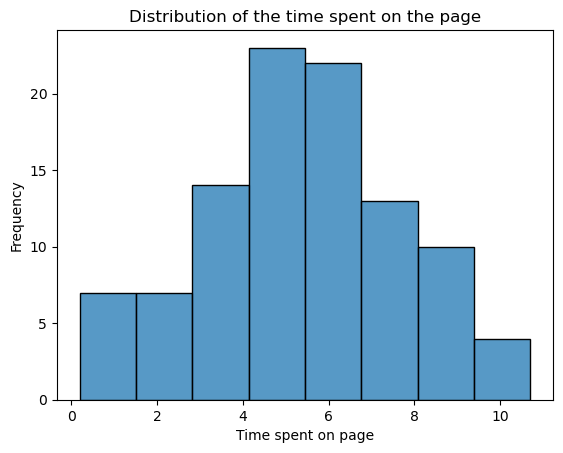

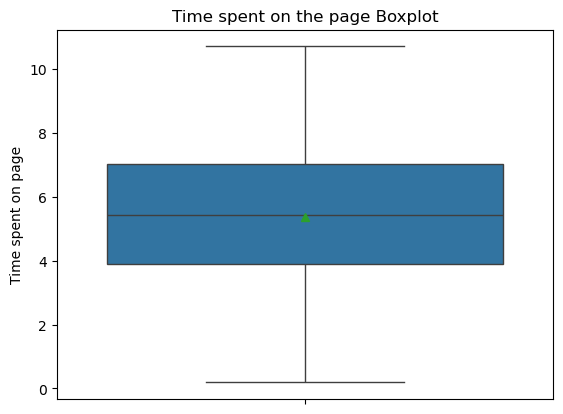

In [19]:
# Histogram showing the distribution of time spent on the page
sns.histplot(data = df,x = "time_spent_on_the_page")
plt.title("Distribution of the time spent on the page")
plt.xlabel("Time spent on page")
plt.ylabel("Frequency")
plt.show();

# Boxplot showing the time spent on page
sns.boxplot(data = df, y = "time_spent_on_the_page", showmeans = True)
plt.title("Time spent on the page Boxplot")
plt.ylabel("Time spent on page")
plt.show();

The histogram follows a normal distribution, with users spending an average of five to six minutes on the page.

The boxplot also shows that the mean time spent was between 5 and 6 minutes. The minimum time was less than a minute and the maximum was more than 11 minutes. No outliers were observed, so it could be sais that no user spent an extremely long time on the page.

### Bivariate Analysis

**Landing page vs Time Spent on Page**

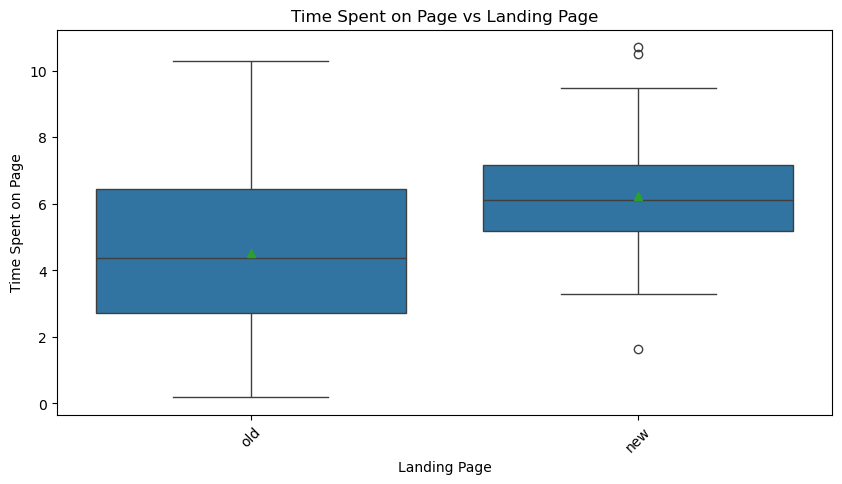

In [20]:
plt.figure(figsize = (10,5))
sns.boxplot(data = df,x = "landing_page",y = "time_spent_on_the_page", showmeans = True)
plt.xticks(rotation=45)
plt.title("Time Spent on Page vs Landing Page")
plt.xlabel("Landing Page")
plt.ylabel("Time Spent on Page")
plt.show();

It was observed that more time on average was significantly spent in the new page compared to the old page.

**Conversion vs Time Spent on Page**

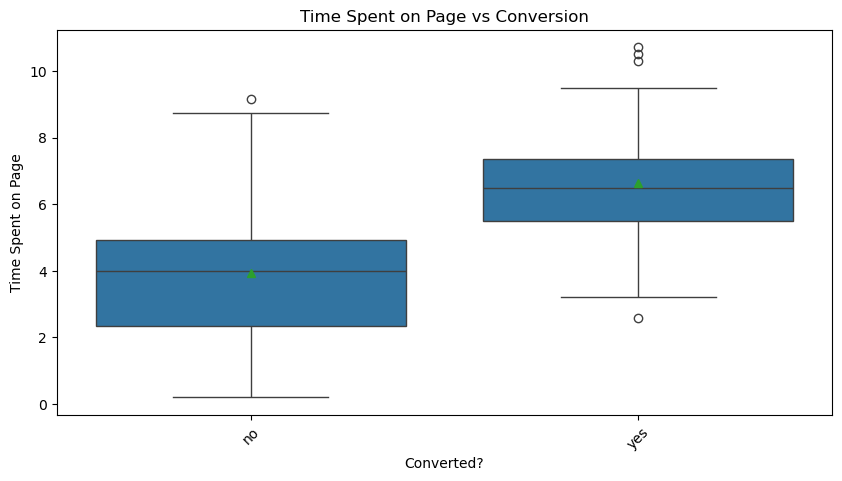

In [21]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = "converted", y = "time_spent_on_the_page", showmeans = True)
plt.xticks(rotation=45)
plt.title("Time Spent on Page vs Conversion")
plt.xlabel("Converted?")
plt.ylabel("Time Spent on Page")
plt.show();

It was observed that converted users on average spent significantly more time on the page compared to non-converted users.

**Language Preferred vs Time Spent on Page**

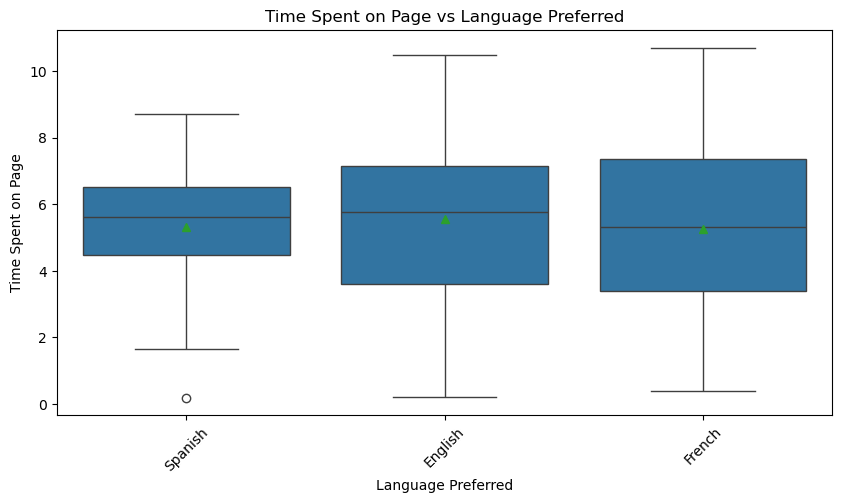

In [22]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = "language_preferred", y = "time_spent_on_the_page", showmeans = True)
plt.xticks(rotation=45)
plt.title("Time Spent on Page vs Language Preferred")
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent on Page")
plt.show();

It was observed that concerning the language preferred, the users spent around the same time on average on the page.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

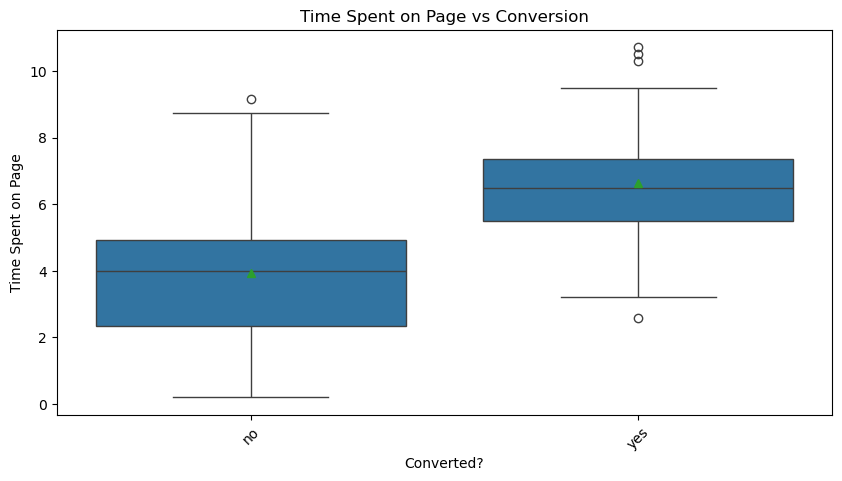

In [23]:
plt.figure(figsize = (10, 5))
sns.boxplot(data = df, x = "converted", y = "time_spent_on_the_page",showmeans = True)
plt.xticks(rotation=45)
plt.title("Time Spent on Page vs Conversion")
plt.xlabel("Converted?")
plt.ylabel("Time Spent on Page")
plt.show();

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The mean time spent on the new landing page is less or equal to that on the old landing page. <br>
$H_a:$ The mean time spent on the new landing page is greater than that on the old landing page.

Let $\mu_1$ and $\mu_2$ be the mean time spent on the new landing page and the mean time spent on the old landing page respectively.


> $H_0: \mu_1 <= \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $


### Step 2: Select Appropriate test

This is a one tailed test. 

There are two population means from two independent populations (New and Old page).

Moreover, the population standard deviations are unknown to us. 

Therefore, the most appropriate test would be a 2-sample independent t-test.

### Step 3: Decide the significance level

$\alpha = 0.05$ as mentioned in the problem statement.

### Step 4: Collect and prepare data

In [24]:
new_page_time = df[df["landing_page"] == "new"]["time_spent_on_the_page"]

old_page_time = df[df["landing_page"] == "old"]["time_spent_on_the_page"]

In [25]:
print("Sample Std of time spent on the new page is:", round(new_page_time.std(),2))
print("Sample Std of time spent on the old page is:", round(old_page_time.std(),2))

Sample Std of time spent on the new page is: 1.82
Sample Std of time spent on the old page is: 2.58


The sample standard deviations are unequal.

### Step 5: Calculate the p-value

In [26]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_page_time, old_page_time, equal_var = False, alternative = "greater")

print("The p-value is: ",p_value)

The p-value is:  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [27]:
if p_value < 0.05:
    print(f"Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.")
else:
    print(f"Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.")

Since the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Because the p-value was found to be less than the level of significance (0.05) we reject the null hypothesis. This is because we have enough statistical evidence to show that the mean time spent on the new landing page is greater than the mean time spent on the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

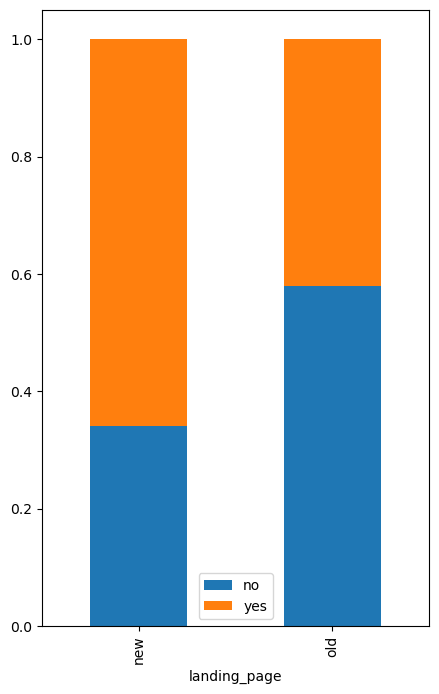

In [28]:
pd.crosstab(df["landing_page"], df["converted"], normalize = "index").plot(kind = "bar", figsize = (5,8),stacked = True)
plt.legend()
plt.show();

### Step 1: Define the null and alternate hypotheses

> $H_0:$ The conversion rate for the new landing page is less or equal to that for the old landing page. <br>
$H_a:$ The conversion rate for the new landing page is greater than that for the old landing page.

Let $\mu_1$ and $\mu_2$ be the conversion rate for the new landing page and the conversion rate for the old landing page respectively.


> $H_0: \mu_1 <= \mu_2 $ <br>
$H_a: \mu_1 > \mu_2 $

### Step 2: Select Appropriate test

This is a one-tailed test.

It concerns two population PROPORTIONS from two independent populations.

Therefore a two proportions z test will be carried out.

### Step 3: Decide the significance level

$\alpha = 0.05$ as mentioned in the problem statement.

### Step 4: Collect and prepare data

In [29]:
# Calculating the number of converted users in the treatment group
new_converted = df[df["group"] == "treatment"]["converted"].value_counts()["yes"]

# Calculating the total number of users in the treatment group
total_treatment = df[df["group"] == "treatment"].value_counts().sum()

print("The numbers of users in the treatment group who converted are: ", new_converted)
print("The total number of users in the control group are: ",total_treatment,"\n")

# Calculating the number of converted users in the control group
old_converted = df[df["group"] == "control"]["converted"].value_counts()["yes"]

# Calculating the total number of users in the control group
total_control = df[df["group"] == "control"].value_counts().sum()

print("The numbers of users in the control group who converted are: ", old_converted)
print("The total number of users in the control group are: ",total_control)

The numbers of users in the treatment group who converted are:  33
The total number of users in the control group are:  50 

The numbers of users in the control group who converted are:  21
The total number of users in the control group are:  50


### Step 5: Calculate the p-value

In [30]:
from statsmodels.stats.proportion import proportions_ztest

# Calculating the p-value
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [total_treatment, total_control], alternative = "larger")

print("The p-value is", p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [31]:
if p_value < 0.05:
    print(f"Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.")
else:
    print(f"Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.")

Since the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Because the p-value was found to be less than the level of significance (0.05) we reject the null hypothesis. This is because we have enough statistical evidence to show that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

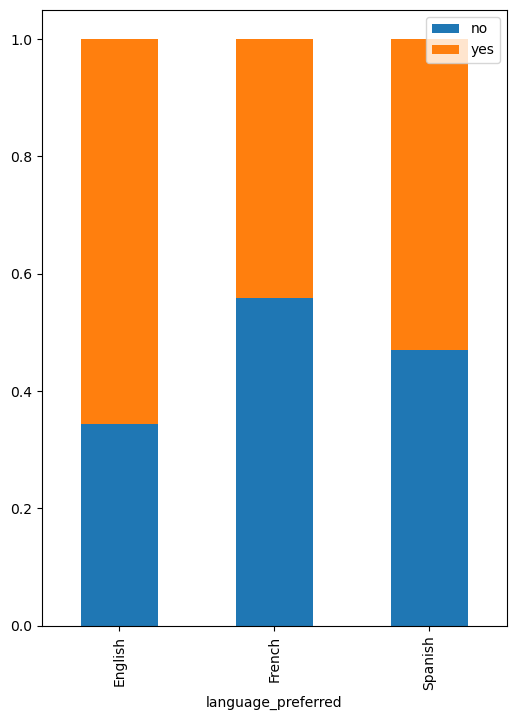

In [32]:
pd.crosstab(df["language_preferred"],df["converted"],normalize = "index").plot(kind = "bar", figsize=(6,8), stacked = True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

> $H_0:$ Conversion and preferred language are independent. <br>
$H_a:$ Conversion and preferred language are related.

### Step 2: Select Appropriate test

We are testing the dependence between two categorical variables.

Therefore a Chi-square test for independence is the most appropriate.

### Step 3: Decide the significance level

$\alpha = 0.05$ as mentioned in the problem statement.

### Step 4: Collect and prepare data

In [33]:
contingency_table = pd.crosstab(df["language_preferred"],df["converted"])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [34]:
from scipy.stats import chi2_contingency

# Calculating the p-value
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print("The p-value is", p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [35]:
if p_value < 0.05:
    print(f"Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.")
else:
    print(f"Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.")

Since the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Because the p-value was found to be greater than the level of significance (0.05) we fail to reject the null hypothesis. This is because we do not have enough statistical evidence to show that conversion and preferred language are related.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

In [36]:
df_new = df[df["landing_page"] == "new"]

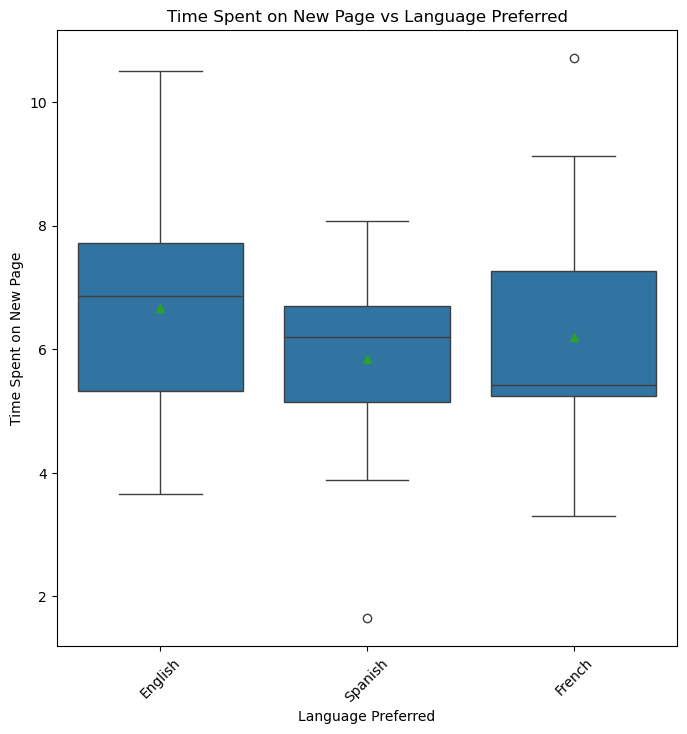

In [37]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df_new, x = "language_preferred", y = "time_spent_on_the_page", showmeans = True)
plt.xticks(rotation=45)
plt.title("Time Spent on New Page vs Language Preferred")
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent on New Page")
plt.show();

In [38]:
df_new.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new page for language preferred English, French and Spanish respectively.


> $H_0$ : $\mu_1 = \mu_2 = \mu_3$

> $H_a$ : At least one of the means  of time spent on the new landing page for a language preferred is different

### Step 2: Select Appropriate test

This concerns more than three population means.

One-way ANOVA is the most appropriate test.

**Shapiro-Wilk’s test**

Testing the null hypothesis

>$H_0:$ Time spent on the new page follows a normal distribution

against the alternative hypothesis

>$H_a:$ Time spent on the new page does not follow a normal distribution

In [39]:
# Shapiro-Wilks Test for testing of normality
from scipy import stats

# Calculating the p-value
w, p_value = stats.shapiro(df_new["time_spent_on_the_page"]) 
print("The p-value is", p_value)

The p-value is 0.8040040364746845


The p-value of the test is found to be larger than the significant value therefore, we fail to reject the null hypothesis.

**Levene’s test**

Testing the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [40]:
# Levene Test for testing of variance
from scipy.stats import levene
statistic, p_value = levene( df_new["time_spent_on_the_page"][df_new["language_preferred"] == "English"], 
                                   df_new["time_spent_on_the_page"][df_new["language_preferred"] == "French"], 
                                   df_new["time_spent_on_the_page"][df_new["language_preferred"] == "Spanish"])
# Calculating the p-value
print("The p-value is", p_value)

The p-value is 0.46711357711340173


The p-value of the test is found to be larger than the significant value therefore, we fail to reject the null hypothesis.

### Step 3: Decide the significance level

$\alpha = 0.05$ as mentioned in the problem statement.

### Step 4: Collect and prepare data

In [41]:
time_spent_English = df_new[df_new["language_preferred"] == "English"]['time_spent_on_the_page']

time_spent_French = df_new[df_new["language_preferred"] == "French"]['time_spent_on_the_page']

time_spent_Spanish = df_new[df_new["language_preferred"] == "Spanish"]['time_spent_on_the_page']   

### Step 5: Calculate the p-value

In [42]:
from scipy.stats import f_oneway

# Calculating the p-value
test_stat, p_value = f_oneway(time_spent_English, time_spent_French, time_spent_Spanish)   #complete the code by filling appropriate parameters in the blanks

print("The p-value is", p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [43]:
if p_value < 0.05:
    print(f"Since the p-value {p_value} is less than the level of significance, we reject the null hypothesis.")
else:
    print(f"Since the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.")

Since the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Because the p-value was found to be greater than the level of significance (0.05) we fail to reject the null hypothesis. This is because we do not have enough statistical evidence to show that at least one of the means  of time spent on the new landing page for a language preferred is different.

## Conclusion and Business Recommendations

#### Conclusion

1. Users spend more time on the new landing page. This means that the new page is more engaging in comparison to the old one

2. The new landing page has a significantly high conversion rate. This proves the effectiveness of the new page.

3. Conversion and language preference are independent. Language has no effect on users' decisions.

4. The time spent on the new page does not differ significantly across language groups. Users spend similar amounts of time on the new page regardless of language.

#### Business Recommendations

1. The new landing page should be fully implemented. Users spend more time on it and the conversion rate is higher.

2. Maintain a universal design on the new page as language does not impact the time spent or the conversion rate.

3. Add interactive elements to enhance engagement.

___